In [7]:
import numpy as np
import pandas as pd
import re
import branca
import folium
import json
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
delitos = pd.read_csv('https://www.datos.gov.co/api/views/75fz-q98y/rows.csv?accessType=DOWNLOAD&bom=true&format=true')

/var/folders/0r/w675m6z55kd3wrm551s772z40000gn/T/ipykernel_11140/2460532296.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  delitos = pd.read_csv('https://www.datos.gov.co/api/views/75fz-q98y/rows.csv?accessType=DOWNLOAD&bom=true&format=true')


In [9]:
delitos.sample(5)

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
4531,4532,SIN EMPLEO DE ARMAS,SAN FRANCISCO,7.164624,-73.139141,URBANA,03. San Francisco,2010,07. Julio,22,04. Jueves,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,39,05. Adultez,UNION LIBRE,MASCULINO,BICICLETA,A PIE
91961,91962,CONTUNDENTES,COLORADOS,7.178713,-73.133004,URBANA,01. Norte,2018,04. Abril,26,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,38,05. Adultez,UNION LIBRE,FEMENINO,A PIE,A PIE
108415,108416,SIN EMPLEO DE ARMAS,SAN FRANCISCO,7.133450053,-73.12522184,URBANA,03. San Francisco,2019,08. Agosto,4,07. Domingo,ARTÍCULO 239. HURTO A ENTIDADES COMERCIALES,HURTO A ENTIDADES COMERCIALES,Lesiones no fatales,50,05. Adultez,UNION LIBRE,MASCULINO,A PIE,A PIE
104016,104017,CONTUNDENTES,LA INMACULADA,71036430434,-731642245479,URBANA,01. Norte,2019,04. Abril,2,02. Martes,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,VIOLENCIA INTRAFAMILIAR,Lesiones no fatales,16,ERROR: #N/A,SOLTERO,FEMENINO,A PIE,A PIE
31340,31341,SIN EMPLEO DE ARMAS,CAMPO HERMOSO,NaN,NaN,URBANA,05. García Rovira,2013,02. Febrero,17,07. Domingo,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ACTOS SEXUALES CON MENOR DE 14 AÑOS,Violencia sexual,7,02. Infancia,SOLTERO,FEMENINO,A PIE,A PIE


In [10]:
delitos.columns= delitos.columns.str.lower()

In [11]:
delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135076 entries, 0 to 135075
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   orden                   135076 non-null  int64 
 1   armas_medios            135076 non-null  object
 2   barrios_hecho           135076 non-null  object
 3   latitud                 128713 non-null  object
 4   longitud                128713 non-null  object
 5   zona                    135076 non-null  object
 6   nom_comuna              135076 non-null  object
 7   ano                     135076 non-null  int64 
 8   mes                     135076 non-null  object
 9   dia                     135076 non-null  int64 
 10  dia_semana              135076 non-null  object
 11  descripcion_conducta    135076 non-null  object
 12  conducta                135076 non-null  object
 13  clasificaciones delito  135076 non-null  object
 14  edad                    135076 non-n

In [12]:
delitos['nom_comuna'] = delitos['nom_comuna'].str.upper()
delitos['nom_comuna'] = delitos['nom_comuna'].str.replace('.',' -')

/var/folders/0r/w675m6z55kd3wrm551s772z40000gn/T/ipykernel_11140/1842341404.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  delitos['nom_comuna'] = delitos['nom_comuna'].str.replace('.',' -')


In [13]:
delitos['ano'] = pd.to_datetime(delitos['ano'], format="%Y").dt.year

In [14]:
delitos["mes"] = delitos['mes'].str[0:2].astype(int)

In [15]:
order = '[^0-9]'
dia= list(delitos['dia_semana'].str.lower())
dias_clean = []
for i in range(len(dia)):
    
    filtered_string = re.sub(order,'',dia[i])
    dias_clean.append(filtered_string.lstrip())        

dias_clean = pd.Series(dias_clean)

In [16]:
delitos['dia_semana'] = pd.to_datetime(dias_clean, format="%d").dt.day

In [17]:
delitos["armas_medios"].replace("NO REPORTADO",np.nan, inplace = True)
delitos["barrios_hecho"].replace("sin informacion",np.nan, inplace = True)
delitos["zona"].replace("NO REPORTA",np.nan, inplace = True)
delitos["nom_comuna"].replace("SIN INFORMACION",np.nan, inplace = True)
delitos["descripcion_conducta"].replace("NO REPORTA",np.nan, inplace = True)
delitos["conducta"].replace("NO REPORTA",np.nan, inplace = True)
delitos["clasificaciones delito"].replace("NO REPORTA",np.nan, inplace = True)
delitos["edad"].replace("NO REPORTA",np.nan, inplace = True)
delitos["curso_de_vida"].replace(["NO REPORTA","ERROR: #N/A"],np.nan, inplace = True)
delitos["estado_civil_persona"].replace("NO REPORTA",np.nan, inplace = True)
delitos["genero"].replace("NO REPORTA",np.nan, inplace = True)
delitos["movil_agresor"].replace("NO REPORTA",np.nan, inplace = True)
delitos["movil_victima"].replace("NO REPORTA",np.nan, inplace = True)

In [18]:
delitos["barrios_hecho"] =delitos["barrios_hecho"].str.upper()

Se pasara a filtrar y dejar unicamente los barrios de la alerta temprana.

In [19]:
delitos["barrios_hecho"].sort_values().unique()

array(['12 DE OCTUBRE', '13 DE JUNIO', '20 DE JULIO', '23 DE JUNIO',
       '5 DE ENERO', 'ACACIAS', 'AFRICA', 'ALARCON', 'ALBANIA',
       'ALFONSO LOPEZ', 'ALTO VIENTO', 'ALTO VIENTO I', 'ALTO VIENTO II',
       'ALTOS DE CAÑAVERAL CAMPESTRE', 'ALTOS DE CAÑAVERAL I',
       'ALTOS DEL CACIQUE', 'ALTOS DEL CAMPESTRE', 'ALTOS DEL KENNEDY',
       'ALTOS DEL PROGRESO', 'ALVAREZ', 'ALVAREZ LAS AMERICAS',
       'ANDALUCIA', 'ANILLO VIAL', 'ANTIGUA COLOMBIA',
       'ANTIGUO CAMPESTRE', 'ANTIGUO COLOMBIA', 'ANTONIA SANTOS',
       'ANTONIA SANTOS CENTRO', 'ANTONIA SANTOS SUR',
       'ASENTAMIENTO SERVIUNON', 'ASENTAMIENTO SERVUNION', 'ASTURIAS',
       'AUTOPISTA F/BLANCA-P/CUESTA.', 'AUTOPISTA P/CUESTA - F/BLANCA.',
       'BALCON DEL LAGO', 'BALCON DEL TEJAR', 'BALCONCITOS',
       'BALCONES DEL KENNEDY', 'BALCONES DEL SUR', 'BARRIO NUEVO',
       'BAVARIA', 'BELLAVISTA', 'BELLAVISTA CASAS', 'BELLAVISTA FLORIDA',
       'BETANIA', 'BOLARQUI', 'BOLIVAR', 'BONANZA CAMPESTRE (COLORADOS)',

In [20]:
barrios_alertatemprana = ["12 DE OCTUBRE","13 DE JUNIO","23 DE JUNIO","5 DE ENERO","ALARCON","BETANIA","ALTOS DEL KENNEDY","ALTOS DEL PROGRESO","BALCONES DEL KENNEDY",
                        "BARRIO NUEVO","BOSQUE NORTE","BUENOS AIRES","CAFE MADRID","CAMILO TORRES","CAMPO MADRID","CARLOS PIZARRO","CHAPINERO","CLAVERIANO","COLORADOS",
                        "COMUNEROS","DIVINO NIÑO","DON BOSCO","EL CINAL","EL ROSAL","EL PABLÓN","LA ESPERANZA I","LA ESPERANZA II", "LA ESPERANZA III","ESTORAQUES",
                        "GAITAN","GALLINERAL","GIRARDOT","GRANADA","JOSE ANTONIO GALAN","JOSE MARIA CORDOBA","KENNEDY","LA FERIA","LA GLORIA","LA INDEPENDENCIA",
                        "LA JUVENTUD","LA INMACULADA","LA UNIVERSIDAD","LAS HAMACAS","OLAS ALTAS","OLAS BAJAS","LIZCANO I","LIZCANO II","LOS ANGELES","MARIA PAZ",
                        "MESETAS DEL SANTUARIO","MINUTO DE DIOS","MIRAFLORES","MIRADOR","MIRADOR DEL KENNEDY","MIRAMAR","MODELO","MORRORICO","MUTUALIDAD","NAPOLES","NARIÑO",
                        "NAVAS","NORTE BAJO","OLAS II","OMAGA I","OMAGA II","PIO XII","PRIMAVERAL","PUERTO RICO","QUEBRADA LA IGLESIA I","REGADERO NORTE","RINCON DE LA PAZ",
                        "SAN CRISTOBAL","SAN RAFAEL","SAN MARTIN","SAN PEDRO CLAVER","SANTANDER","TEJAR NORTE","TRANSICION","TRANSICION I","TRANSICION II","TRANSICION III",
                        "TRANSICION IV","TRANSICION V","VILLA HELENA I","VILLA HELENA II","VILLA HELENA","VILLA ROSA","VILLA MARIA I","VILLA MARIA III", "VILLA MERCEDES",
                        "VILLA ROSA","VILLAS DE GIRARDOT", "ZARABANDA"]

El diccionario con las variables a cambiar:

In [21]:
barrios_cambiar = {
    "DIVINO NIÑO (COLORADOS)": "DIVINO NIÑO",
    "EL PABLON": "EL PABLÓN",
    "EL PABLON ( LA TORRE )": "EL PABLÓN",
    "EL PABLON ( VILLA LINA )": "EL PABLÓN",
    "EL PABLON ( VILLA PATRICIA )": "EL PABLÓN",
    "ESPERANZA I": "LA ESPERANZA I",
    "ESPERANZA II": "LA ESPERANZA II",
    "ESPERANZA III": "LA ESPERANZA III",
    "MIRADORES DEL KENNEDY": "MIRADOR DEL KENNEDY",
    "OMAGA (SECTOR I )": "OMAGA I",
    "OMAGA (SECTOR II )": "OMAGA II",
    "QUEBRADA LA IGLESIA": "QUEBRADA LA IGLESIA I",
    "TEJAR NORTE (SECTOR I )" : "TEJAR NORTE",
    "TEJAR NORTE (SECTOR II )" : "TEJAR NORTE",
    "VILLA MARIA" : "VILLA MARIA I",
    "VILLA MARIA III (BAJA)":"VILLA MARIA III",
    "VILLA ROSA (SECTOR II )":"VILLA ROSA",
    "VILLA ROSA (SECTOR III )":"VILLA ROSA",
    "INV. VILLAS DEL GIRARDOT" : "VILLAS DE GIRARDOT"
}

In [22]:
delitos["barrios_hecho"] = delitos["barrios_hecho"].replace(barrios_cambiar)

In [23]:
delitos = delitos[delitos["barrios_hecho"].isin(barrios_alertatemprana)]

In [24]:
delitos.sample(5)

,orden,armas_medios,barrios_hecho,latitud,longitud,zona,nom_comuna,ano,mes,dia,dia_semana,descripcion_conducta,conducta,clasificaciones delito,edad,curso_de_vida,estado_civil_persona,genero,movil_agresor,movil_victima
49840,49841,ARMA BLANCA / CORTOPUNZANTE,COLORADOS,7.177546,-73.134305,URBANA,01 - NORTE,2014,11,23,7,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,36,05. Adultez,SOLTERO,MASCULINO,A PIE,A PIE
126061,126062,CONTUNDENTES,VILLA HELENA I,7.1532050611,-73.1269952444,URBANA,02 - NOR ORIENTAL,2021,3,14,7,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,NaN,NaN,NaN,NaN,A PIE,A PIE
46038,46039,CONTUNDENTES,LA INDEPENDENCIA,7.141193,-73.125207,URBANA,03 - SAN FRANCISCO,2014,7,29,2,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,VIOLENCIA INTRAFAMILIAR,Lesiones no fatales,21,04. Jovenes,UNION LIBRE,FEMENINO,A PIE,A PIE
29943,29944,CONTUNDENTES,GAITAN,7.131711,-73.13518,URBANA,04 - OCCIDENTAL,2012,12,30,7,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,26,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
67113,67114,VEHICULO,MODELO,7.135798,-73.13116,URBANA,03 - SAN FRANCISCO,2016,5,20,5,ARTÍCULO 120. LESIONES CULPOSAS ( EN ACCIDENTE...,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),Lesiones no fatales,27,04. Jovenes,SOLTERO,MASCULINO,CONDUCTOR VEHICULO,CONDUCTOR MOTOCICLETA


In [ ]:
delitos_barrios = delitos.groupby(["barrios_hecho"]).size().to_frame("quantity").reset_index()
#delitos_barrios.to_csv("delitos_barrios.csv")

In [ ]:
delitos_genero = delitos.groupby(["barrios_hecho","genero"]).size().to_frame("quantity").reset_index()
#delitos_genero.to_csv("delitos_genero.csv")

In [ ]:
delitos_edad = delitos.groupby(["barrios_hecho","curso_de_vida"]).size().to_frame("quantity").reset_index()
#delitos_edad.to_csv("delitos_edad.csv")

In [ ]:
delitos_clasificacion = delitos.groupby(["barrios_hecho","clasificaciones delito"]).size().to_frame("quantity").reset_index()
#delitos_clasificacion.to_csv("delitos_clasificacion.csv")

In [ ]:
delitos_ano = delitos.groupby(["barrios_hecho","ano"]).size().to_frame("quantity").reset_index()
#delitos_ano.to_csv("delitos_ano.csv")

In [25]:
dicc_cond = {"HURTO A PERSONAS":"HURTO",
             "HURTO A ENTIDADES COMERCIALES":"HURTO",
             "HURTO A RESIDENCIAS":"HURTO",
             "HURTO A MOTOCICLETAS":"HURTO",
             "HURTO A AUTOMOTORES":"HURTO",
             "HURTO A ABIGEATO":"HURTO",
             "HURTO A PIRATERÍA TERRESTRE":"HURTO",
             "ACTOS SEXUALES CON MENOR DE 14 AÑOS":"DELITOS SEXUALES O PROSTITUCION",
             "ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS":"DELITOS SEXUALES O PROSTITUCION",
             "ACCESO CARNAL VIOLENTO":"DELITOS SEXUALES O PROSTITUCION",
             "ACTO SEXUAL VIOLENTO":"DELITOS SEXUALES O PROSTITUCION",
             "ACOSO SEXUAL":"DELITOS SEXUALES O PROSTITUCION",
             "ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPAZ DE RESISTIR":"DELITOS SEXUALES O PROSTITUCION",
             "ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR":"DELITOS SEXUALES O PROSTITUCION",
             "PORNOGRAFÍA CON MENORES":"DELITOS SEXUALES O PROSTITUCION",
             "UTILIZACIÓN O FACILITACIÓN DE MEDIOS DE COMUNICACIÓN PARA OFRECER SERVICIOS SEXUALES DE MENORES":"DELITOS SEXUALES O PROSTITUCION",
             "INDUCCIÓN A LA PROSTITUCIÓN":"DELITOS SEXUALES O PROSTITUCION",
             "ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS AGRAVACIÓN)":"DELITOS SEXUALES O PROSTITUCION",
             "ACTOS SEXUALES CON MENOR DE 14 AÑOS (CIRCUNSTANCIAS DE AGRAVACIÓN)":"DELITOS SEXUALES O PROSTITUCION",
             "ACTO SEXUAL VIOLENTO (CIRCUNSTANCIAS DE AGRAVACIÓN)":"DELITOS SEXUALES O PROSTITUCION",
             "ACCESO CARNAL VIOLENTO (CIRCUNSTANCIAS AGRAVACIÓN)":"DELITOS SEXUALES O PROSTITUCION",
             "CONSTREÑIMIENTO A LA PROSTITUCIÓN ":"DELITOS SEXUALES O PROSTITUCION",
             "PROXENETISMO CON MENOR DE EDAD":"DELITOS SEXUALES O PROSTITUCION",
             "DEMANDA DE EXPLOTACION SEXUAL COMERCIAL DE PERSONA MENOR DE 18 AÑOS DE EDAD":"DELITOS SEXUALES O PROSTITUCION",
             "ESTÍMULO A LA PROSTITUCIÓN DE MENORES":"DELITOS SEXUALES O PROSTITUCION",
             "CONSTREÑIMIENTO A LA PROSTITUCIÓN":"DELITOS SEXUALES O PROSTITUCION",
             "HOMICIDIO":"OTROS",
             "HOMICIDIO CULPOSO ( EN ACCIDENTE DE TRÁNSITO)":"OTROS",
             "EXTORSIÓN":"OTROS",
             "AMENAZAS":"OTROS",
             "FEMINICIDIO":"OTROS",
             "SECUESTRO SIMPLE":"OTROS",
             "INCAPACIDAD PARA TRABAJAR O ENFERMEDAD":"OTROS",
             "LESIONES AL FETO":"OTROS",
             "LESIONES PERSONALES ( CIRCUNSTANCIAS DE AGRAVACIÓN)":"OTROS"
             }

In [26]:
delitos["conducta"] = delitos["conducta"].replace(dicc_cond)

In [ ]:
delitos_conducta = delitos.groupby(["barrios_hecho","conducta"]).size().to_frame("quantity").reset_index()
#delitos_conducta.to_csv("delitos_conducta.csv")

In [27]:
delitos_ano = delitos.groupby(["ano"]).size().to_frame("quantity").reset_index()

Text(0, 0.5, 'Number of crimes')

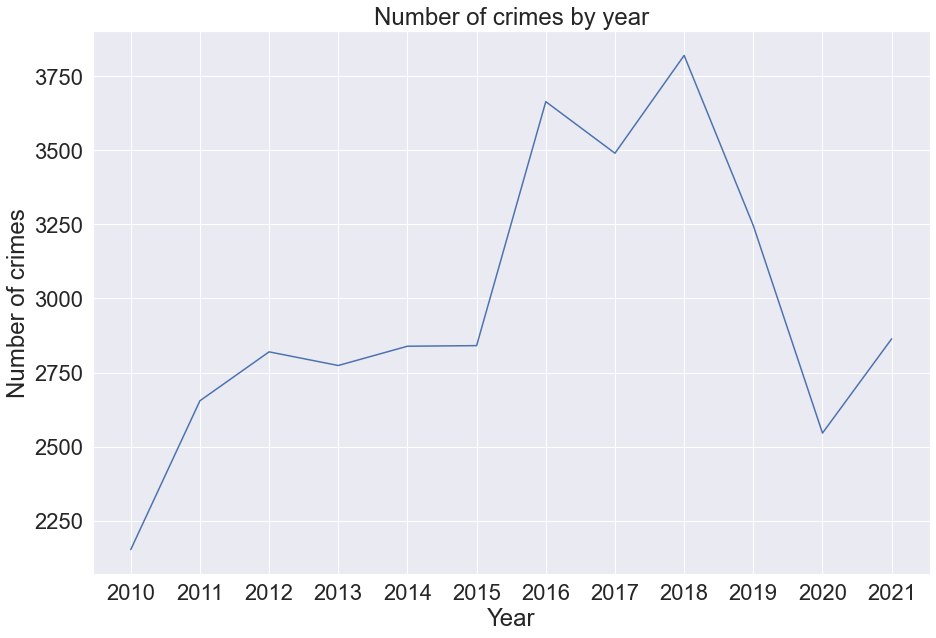

In [29]:
sns.set(font_scale =2)
fig, ax = plt.subplots(figsize=(15,10))
palette = sns.color_palette("flare", 6)
ln_plot = sns.lineplot(data=delitos_ano, x = "ano", y ="quantity", palette=palette)
ln_plot.set_xticks(delitos_ano["ano"])
ln_plot.set_title("Number of crimes by year")
ln_plot.set_xlabel("Year")
ln_plot.set_ylabel("Number of crimes")

In [ ]:
delitos.groupby("ano").size().plot(title="Number of crimes by year", figsize =(15,6), xlabel = "Year", ylabel = "Yearly total crimes")

In [ ]:
delitos_barrios

In [ ]:
barrios_mas_violentos = delitos_barrios.sort_values(by="quantity",ascending=False).head(10)
barrios_menos_violentos = delitos_barrios.sort_values(by="quantity",ascending=True).head(10).sort_values(by="quantity", ascending=False)

In [ ]:
sns.set(font_scale =2)
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x="barrios_hecho", y="quantity", data=barrios_mas_violentos, palette="Accent")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
ax.set(title="Neighborhoods with the most amount of crimes")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Number of crimes")

In [ ]:
sns.set(font_scale =2)
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x="barrios_hecho", y="quantity", data=barrios_menos_violentos, palette="Accent_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
ax.set(title="Neighborhoods with the least amount of crimes")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Number of crimes")

In [ ]:
sns.set(font_scale =1)
plt.subplots(figsize=(25,10))
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(delitos_conducta2["quantity"], labels=delitos_conducta2["conducta"],autopct='%1.1f%%', pctdistance=0.85, explode=explode)
circle = plt.Circle((0,0),0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("% Type of crime presented")
plt.show()

In [ ]:
delitos_conducta2 = delitos.groupby(["conducta"]).size().to_frame("quantity").reset_index()

In [ ]:
delitos_conducta2=delitos_conducta2.sort_values(by="quantity", ascending= False)